Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"

In [3]:
%cd /content/drive/My Drive/Kaggle/assignment_2

/content/drive/My Drive/Kaggle/assignment_2


In [4]:
data = pd.read_csv('Default_Fin.csv')
data.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [5]:
data.shape

(10000, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [7]:
data.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [8]:
#Числовые признаки
num_cols = [
            'Bank Balance',
            'Annual Salary',
]

#Лэйбл
label_col = [
             'Defaulted?'
]

#feature
feature_cols = [
                'Employed',
                'Bank Balance',
                'Annual Salary',
]

In [9]:
X = data[feature_cols]
y = data['Defaulted?']

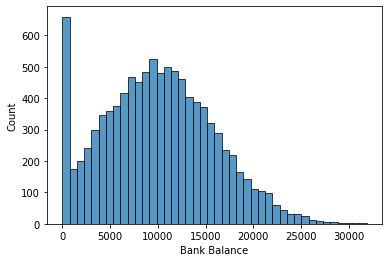

In [10]:
sns.histplot(X['Bank Balance']);

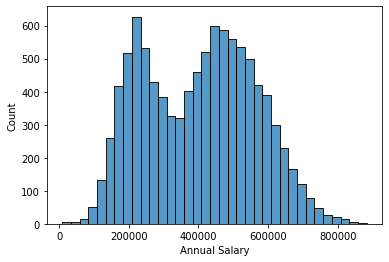

In [11]:
sns.histplot(X['Annual Salary']);

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
X_scaled_col_1 = scaler.fit_transform(X[['Bank Balance']])
X_scaled_col_2 = scaler.fit_transform(X[['Annual Salary']])

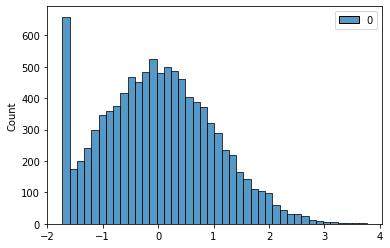

In [14]:
sns.histplot(X_scaled_col_1);

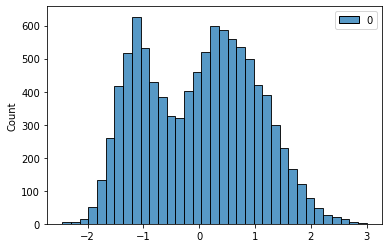

In [15]:
sns.histplot(X_scaled_col_2);

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)

In [25]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

**Метод опорных векторов**

In [18]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
y_pred_svc = svc.predict(X_test)

In [28]:
print('Accuracy Score: {}\nF1 Score: {}'.format(
    accuracy_score(y_test, y_pred_svc), 
    f1_score(y_test, y_pred_svc)))

Accuracy Score: 0.968
F1 Score: 0.2558139534883721


**Случайный лес**

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=4)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
y_pred_rf = rf.predict(X_test)

In [37]:
print('Accuracy Score: {}\nF1 Score: {}'.format(
    accuracy_score(y_test, y_pred_rf), 
    f1_score(y_test, y_pred_rf)))

Accuracy Score: 0.9645
F1 Score: 0.297029702970297
